In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

In [2]:
#Disable warning in Anaconda
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import Iris dataset
df = pd.read_excel('Iris.xls')
df.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Since the features' scale is quite close to each other, there is no need for feature scaling.

In [4]:
iris_class = {
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}
df['species_num']=[iris_class[x] for x in df['iris']]

<AxesSubplot:xlabel='petallength', ylabel='petalwidth'>

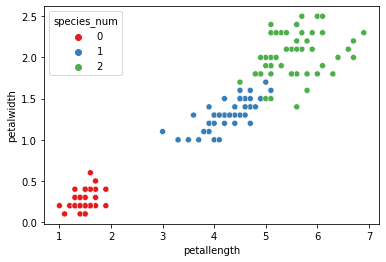

In [5]:
#Scatter plot for petal length and width
sns.scatterplot(df['petallength'],df['petalwidth'],data = df, hue = 'species_num', palette = 'Set1')

In [6]:
X = df.drop(['species_num','iris'], axis=1)
y = df['species_num']

In [7]:
X.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [10]:
logreg = LogisticRegression(multi_class = 'multinomial', solver='lbfgs')
logreg.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [11]:
y_pred = logreg.predict(X_test)

In [12]:
#Accuracy score of the model
print('Training accuracy score: ',accuracy_score(y_train, logreg.predict(X_train)))
print('Testing accuracy score: ',accuracy_score(y_test, y_pred))

Training accuracy score:  0.975
Testing accuracy score:  1.0


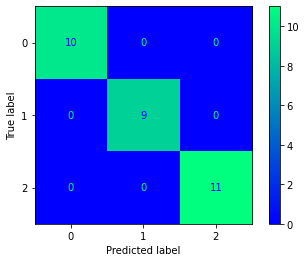

In [18]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(cmap = 'winter')